# Deep Learning Assignment 1: Implementing XOR gate

In this assignment you will be asked to write a DNN program that can output the XOR gate. First, we will show you that a single layer perceptron will fail as it can only approximate an linear classifier. Later you will be asked to finish the multi-layer perceptron.

# Table of Contents

1. **_The Perceptron_**

   Structure and Properties
   
   Evalutation
   
   Training algorithm
      
      
2. **_2d Xor problem_**

   The XOR function
   
   
3. **_Attempt #1: The Single Layer Perceptron_**

   Implementing the Perceptron algorithm
   
   Results
   
   The need for non-linearity
    
    
4. **_Attempt #2: Multiple Decision Boundaries_**

   Intuition
   
   Implementing the OR and NAND parts
    
    
5. **_The Multi-layered Perceptron_**

   Structure and Properties
   
   Training algorithm
    
    
6. **_Attempt #3: The Multi-layered Perceptron_**

   Implementing the MLP
   
   Results

 # _**Let’s review the basic perceptron**_

A perceptron has the following components:


*   Input node
*   Output node

*   An activation function
*   Weights and biases

*   Error function

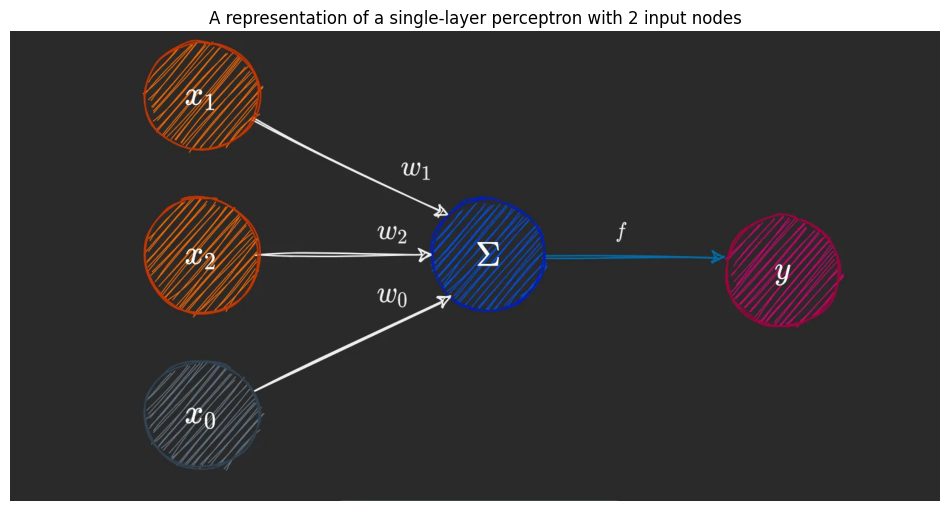

### **Input Nodes**
These nodes contain the input to the network. In any iteration — whether testing or training — these nodes are passed the input from our data.

### **Weights and Biases**

These parameters are what we update when we talk about “training” a model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. Basically, it makes the model more flexible, since you can “move” the activation function around.

### **Evaluation**
The output calculation is straightforward.



*   Compute the dot product of the input and weight vector
*   Add the bias

*   Apply the activation function.






This can be expressed like so:

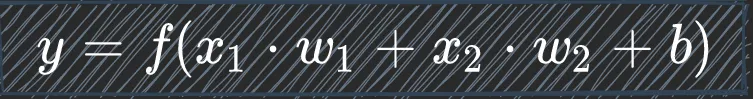

This is often simplified and written as a dot- product of the weight and input vectors plus the bias.

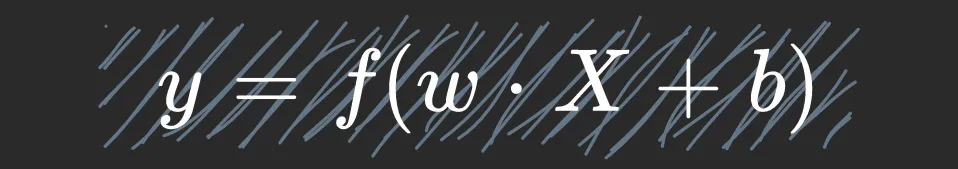

### **Activation Function**

This function allows us to fit the output in a way that makes more sense. For example, in the case of a simple classifier, an output of say -2.5 or 8 doesn’t make much sense with regards to classification. If we use something called a sigmoidal activation function, we can fit that within a range of 0 to 1, which can be interpreted directly as a probability of a datapoint belonging to a particular class.

Though there are many kinds of activation functions, we’ll be using a simple linear activation function for our perceptron. The linear activation function has no effect on its input and outputs it as is.

### **Classification**

How does a perceptron assign a class to a datapoint?

We know that a datapoint’s evaluation is expressed by the relation $wX + b$ . We define a threshold ($θ$) which classifies our data. Generally, this threshold is set to 0 for a perceptron.

So points for which $wX + b$ is greater than or equal to 0 will belong to one class while the rest ($wX + b$ is negative) are classified as belonging to the other class. We can express this as:

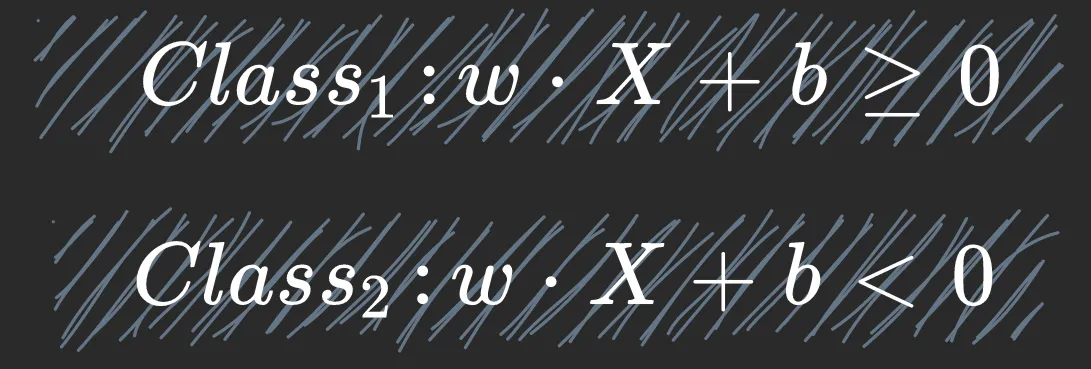

### **Training algorithm**
To train our perceptron, we must ensure that we correctly classify all of our train data. Note that this is different from how you would train a neural network, where you wouldn’t try and correctly classify your entire training data. That would lead to something called overfitting in most cases.

We start the training algorithm by calculating the gradient, or Δw. Its the product of:


*   the value of the input node corresponding to that weight
*   The difference between the actual value and the computed value.





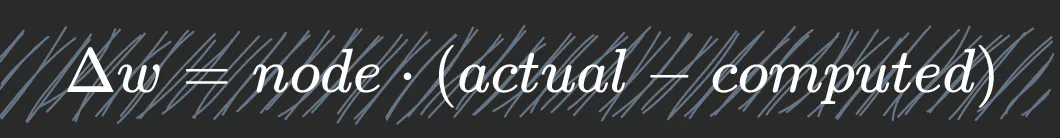

We get our new weights by simply incrementing our original weights with the computed gradients multiplied by the learning rate.

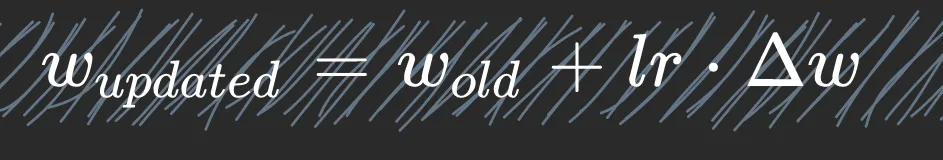

A simple intuition for how this works: if our perceptron correctly classifies an input data point, `actual value — computed value` would be 0 , and there wouldn’t be any change in our weights since the gradient is now 0.

 # _**XOR Problem**_

In the XOR problem, we are trying to train a model to mimic a 2D XOR function.

### **The XOR function**
The function is defined like so:

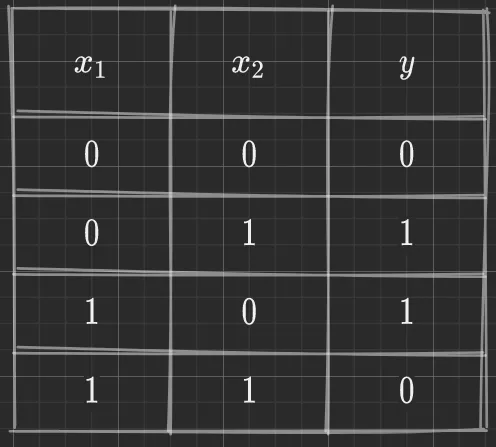

The XOR Truth table

If we plot it, we get the following chart. This is what we’re trying to classify. The ⊕ (“o-plus”) symbol you see in the legend is conventionally used to represent the XOR boolean operator.



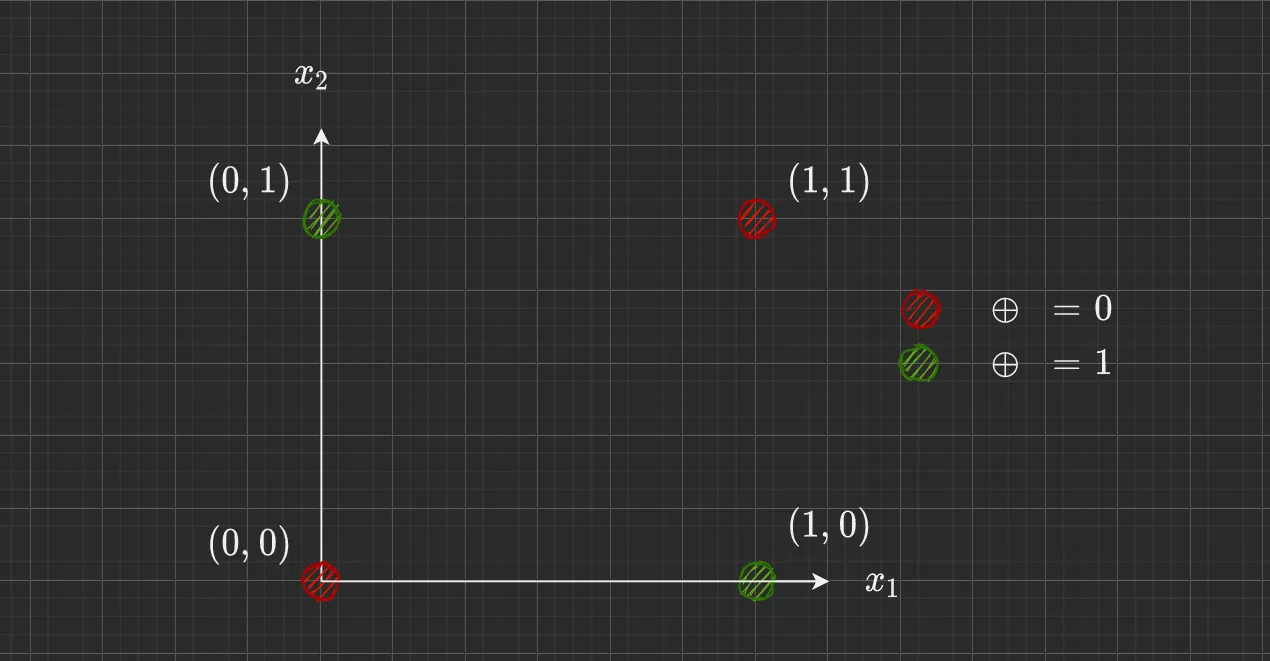

The XOR output plot 

Our algorithm —regardless of how it works — must correctly output the XOR value for each of the 4 points. We’ll be modelling this as a classification problem, so `Class 1` would represent an XOR value of 1, while `Class 0` would represent a value of 0.

# _**Attempt #1: The Single Layer Perceptron**_
Let's model the problem using a single layer perceptron.

### **Input data**
The data we’ll train our model on is the table we saw for the XOR function.

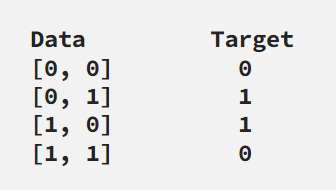

### **Implementation**
#### **Imports**

Apart from the usual visualization ( `matplotliband seaborn`) and numerical libraries (`numpy`), we’ll use `cycle` from `itertools` . This is done since our algorithm cycles through our data indefinitely until it manages to correctly classify the entire training data without any mistakes in the middle.

In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **The data**

We next create our training data. This data is the same for each kind of logic gate, since they all take in two boolean variables as input.

In [2]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

target_nand = np.array(
    [
        [1],
        [1],
        [1],
        [0]])

target_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

target_and = np.array(
    [
        [0],
        [0],
        [0],
        [1]])

### **The training function**

Here, we cycle through the data indefinitely, keeping track of how many consecutive datapoints we correctly classified. If we manage to classify everything in one stretch, we terminate our algorithm.

If not, we reset our counter, update our weights and continue the algorithm.

In [3]:
def train(self):
    """
    Train a single layer perceptron.
    """
    # the number of consecutive correct classifications
    correct_counter = 0

    for train, target in cycle(zip(self.train_data, self.target)):
        # end if all points are correctly classified
        if correct_counter == len(self.train_data):
            break

        output = self.classify(train)
        self.node_val = train

        if output == target:
            correct_counter += 1
        else:
            # if incorrectly classified, update weights and reset correct_counter
            self.update_weights(target, output)
            correct_counter = 0

In [4]:
def _gradient(self, node, exp, output):
    """
    Return the gradient for a weight.
    This is the value of delta-w.
    """
    return node * (exp - output)

def update_weights(self, exp, output):
    """
    Update weights and bias based on their respective gradients
    """
    for i in range(self.input_nodes):
        self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)

    # the value of the bias node can be considered as being 1 and the weight between this node
    # and the output node being self.b
    self.b += self.lr * self._gradient(1, exp, output)

def forward(self, datapoint):
    """
    One forward pass through the perceptron.
    Implementation of "wX + b".
    """
    return self.b + np.dot(self.w, datapoint)

def classify(self, datapoint):
    """
    Return the class to which a datapoint belongs based on
    the perceptron's output for that point.
    """
    if self.forward(datapoint) >= 0:
        return 1

To visualize how our model performs, we create a mesh of datapoints, or a grid, and evaluate our model at each point in that grid. Finally, we colour each point based on how our model classifies it. So the `Class 0` region would be filled with the colour assigned to points belonging to that class.

In [5]:
def plot(self, h=0.01):
    """
    Generate plot of input data and decision boundary.
    """
    # setting plot properties like size, theme and axis limits
    sns.set_style('darkgrid')
    plt.figure(figsize=(20, 20))

    plt.axis('scaled')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

    colors = {
        0: "ro",
        1: "go"
    }

    # plotting the four datapoints
    for i in range(len(self.train_data)):
        plt.plot([self.train_data[i][0]],
                 [self.train_data[i][1]],
                 colors[self.target[i][0]],
                 markersize=20)

    x_range = np.arange(-0.1, 1.1, h)
    y_range = np.arange(-0.1, 1.1, h)

    # creating a mesh to plot decision boundary
    xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
    Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

    # using the contourf function to create the plot
    plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

### **The Perceptron class**

To bring everything together, we create a simple `Perceptron` class with the functions we just discussed. We have some instance variables like the training data, the target, the number of input nodes and the learning rate.

In [6]:
class Perceptron:
    """
    Create a perceptron.
    train_data: A 4x2 matrix with the input data.
    target: A 4x1 matrix with the perceptron's expected outputs
    lr: the learning rate. Defaults to 0.01
    input_nodes: the number of nodes in the input layer of the perceptron.
        Should be equal to the second dimension of train_data.
    """

    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes

        # randomly initialize the weights and set the bias to -1.
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1

        # node_val hold the values of each node at a given point of time.
        self.node_val = np.zeros(self.input_nodes)

    def _gradient(self, node, exp, output):
        """
        Return the gradient for a weight.
        This is the value of delta-w.
        """
        return node * (exp - output)

    def update_weights(self, exp, output):
        """
        Update weights and bias based on their respective gradients
        """
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)

        # the value of the bias node can be considered as being 1 and the weight between this node
        # and the output node being self.b
        self.b += self.lr * self._gradient(1, exp, output)

    def forward(self, datapoint):
        """
        One forward pass through the perceptron.
        Implementation of "wX + b".
        """
        return self.b + np.dot(self.w, datapoint)

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        if self.forward(datapoint) >= 0:
            return 1

        return 0
    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)


    def train(self):
        """
        Train a single layer perceptron.
        """
        # the number of consecutive correct classifications
        correct_counter = 0
        train_counter = 0

        for train, target in cycle(zip(self.train_data, self.target)):
            # end if all points are correctly classified
            if correct_counter == len(self.train_data):
                break
            if train_counter >= 1000:
                print('ERROR: Fail to converge.Program aborted after 1000 iterations.')
                break
            train_counter +=1
            output = self.classify(train)
            self.node_val = train

            if output == target:
                correct_counter += 1
            else:
                # if incorrectly classified, update weights and reset correct_counter
                self.update_weights(target, output)
                correct_counter = 0

### **Results**
Let’s create a perceptron object and train it on the XOR data.

In [7]:
p_xor = Perceptron(train_data, target_xor)
p_xor.train()

ERROR: Fail to converge.Program aborted after 1000 iterations.


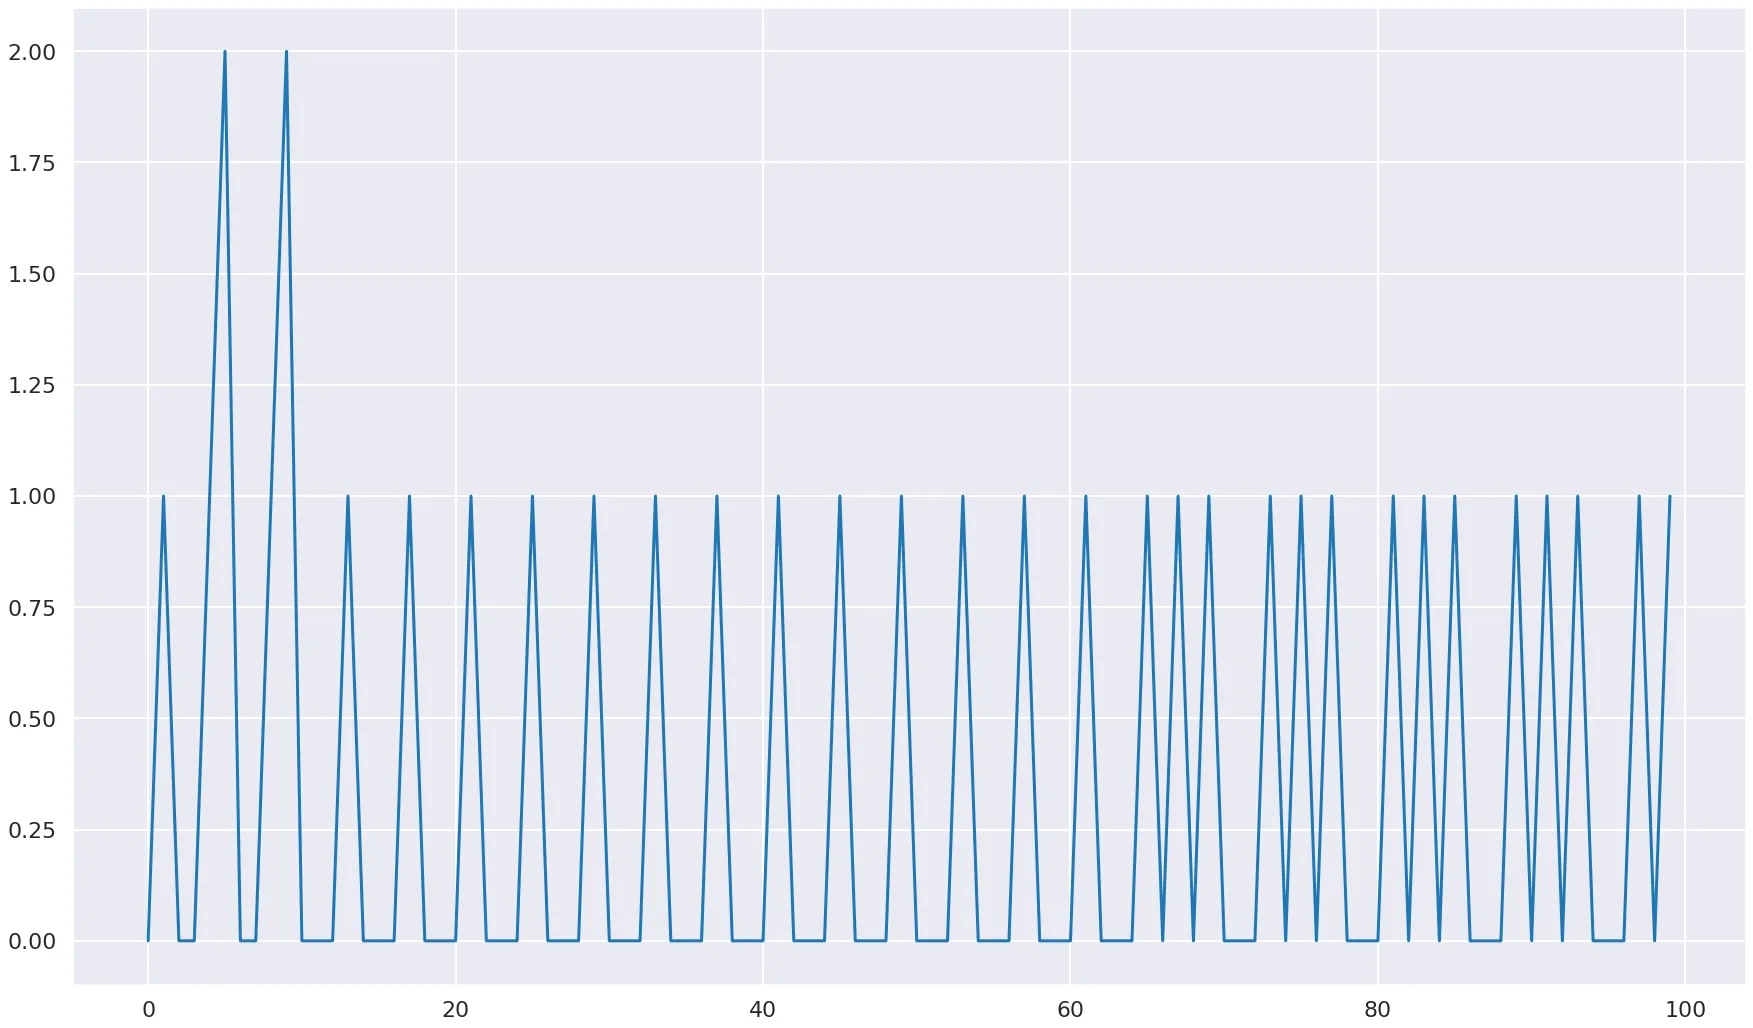

You’ll notice the error message, since a perceptron can only converge on linearly separable data. Linearly separable data basically means that you can separate data with a point in 1D, a line in 2D, a plane in 3D and so on.

**A perceptron can only converge on linearly separable data. Therefore, it isn’t capable of imitating the XOR function.**

Remember that a perceptron must correctly classify the entire training data in one go. If we keep track of how many points it correctly classified consecutively, we get something like this.

The algorithm only terminates when correct_counter hits 4 — which is the size of the training set — so this will go on indefinitely.

### **The Need for Non-Linearity**
It is clear that a single perceptron will not serve our purpose: the classes aren’t linearly separable. This boils down to the fact that a single linear decision boundary isn’t going to work.

Non-linearity allows for more complex decision boundaries. One potential decision boundary for our XOR data could look like this.

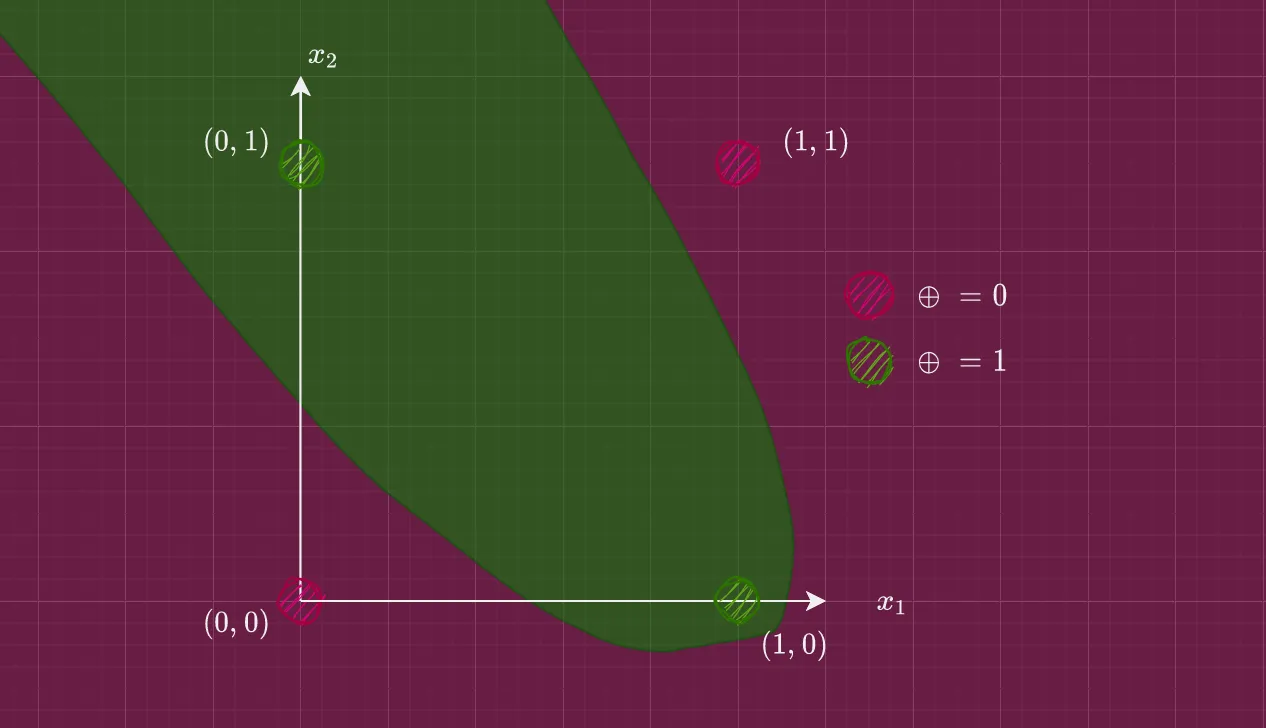

A potential non-linear decision boundary for our XOR model

# _**The 2d XOR problem — Attempt #2**_
We know that the imitating the XOR function would require a non-linear decision boundary.

But why do we have to stick with a single decision boundary?

### **The Intuition**

Let’s first break down the XOR function into its AND and OR counterparts.

The XOR function on two boolean variables A and B is defined as:

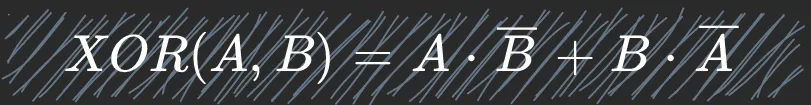

Let’s add `A.~A` and `B.~B` to the equation. Since they both equate to 0, the equation remains valid.

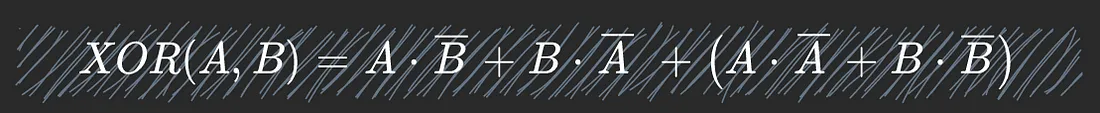

Let’s rearrange the terms so that we can pull out A from the first part and B from the second.

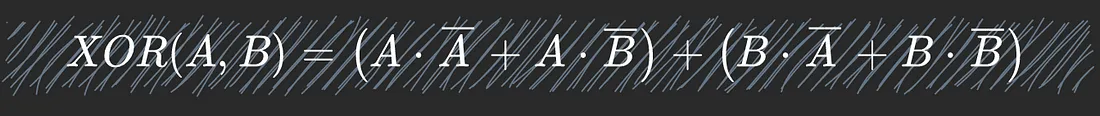

Simplifying it further, we get:

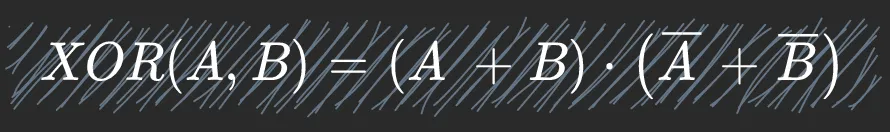

Using DeMorgan’s laws for boolean algebra:`~A + ~B = ~(AB)` , we can replace the second term in the above equation like so:

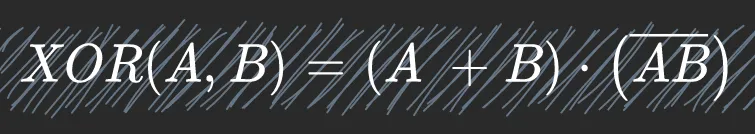

Let’s replace A and B with x_1 and x_2 respectively since that’s the convention we’re using in our data.

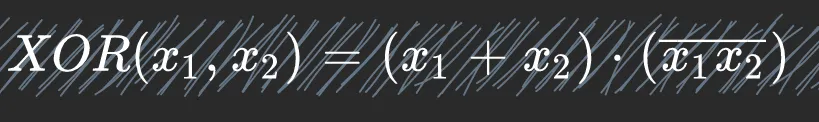

The XOR function can be condensed into two parts: a NAND and an OR. If we can calculate these separately, we can just combine the results, using an AND gate.

Let’s call the OR section of the formula part I, and the NAND section as part II.

### **Modelling the OR part**
We’ll use the same Perceptron class as before, only that we’ll train it on OR training data.

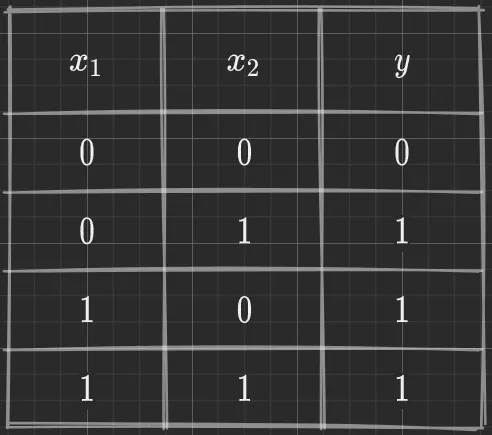

The OR truth table

In [8]:
p_or = Perceptron(train_data, target_or)
p_or.train()

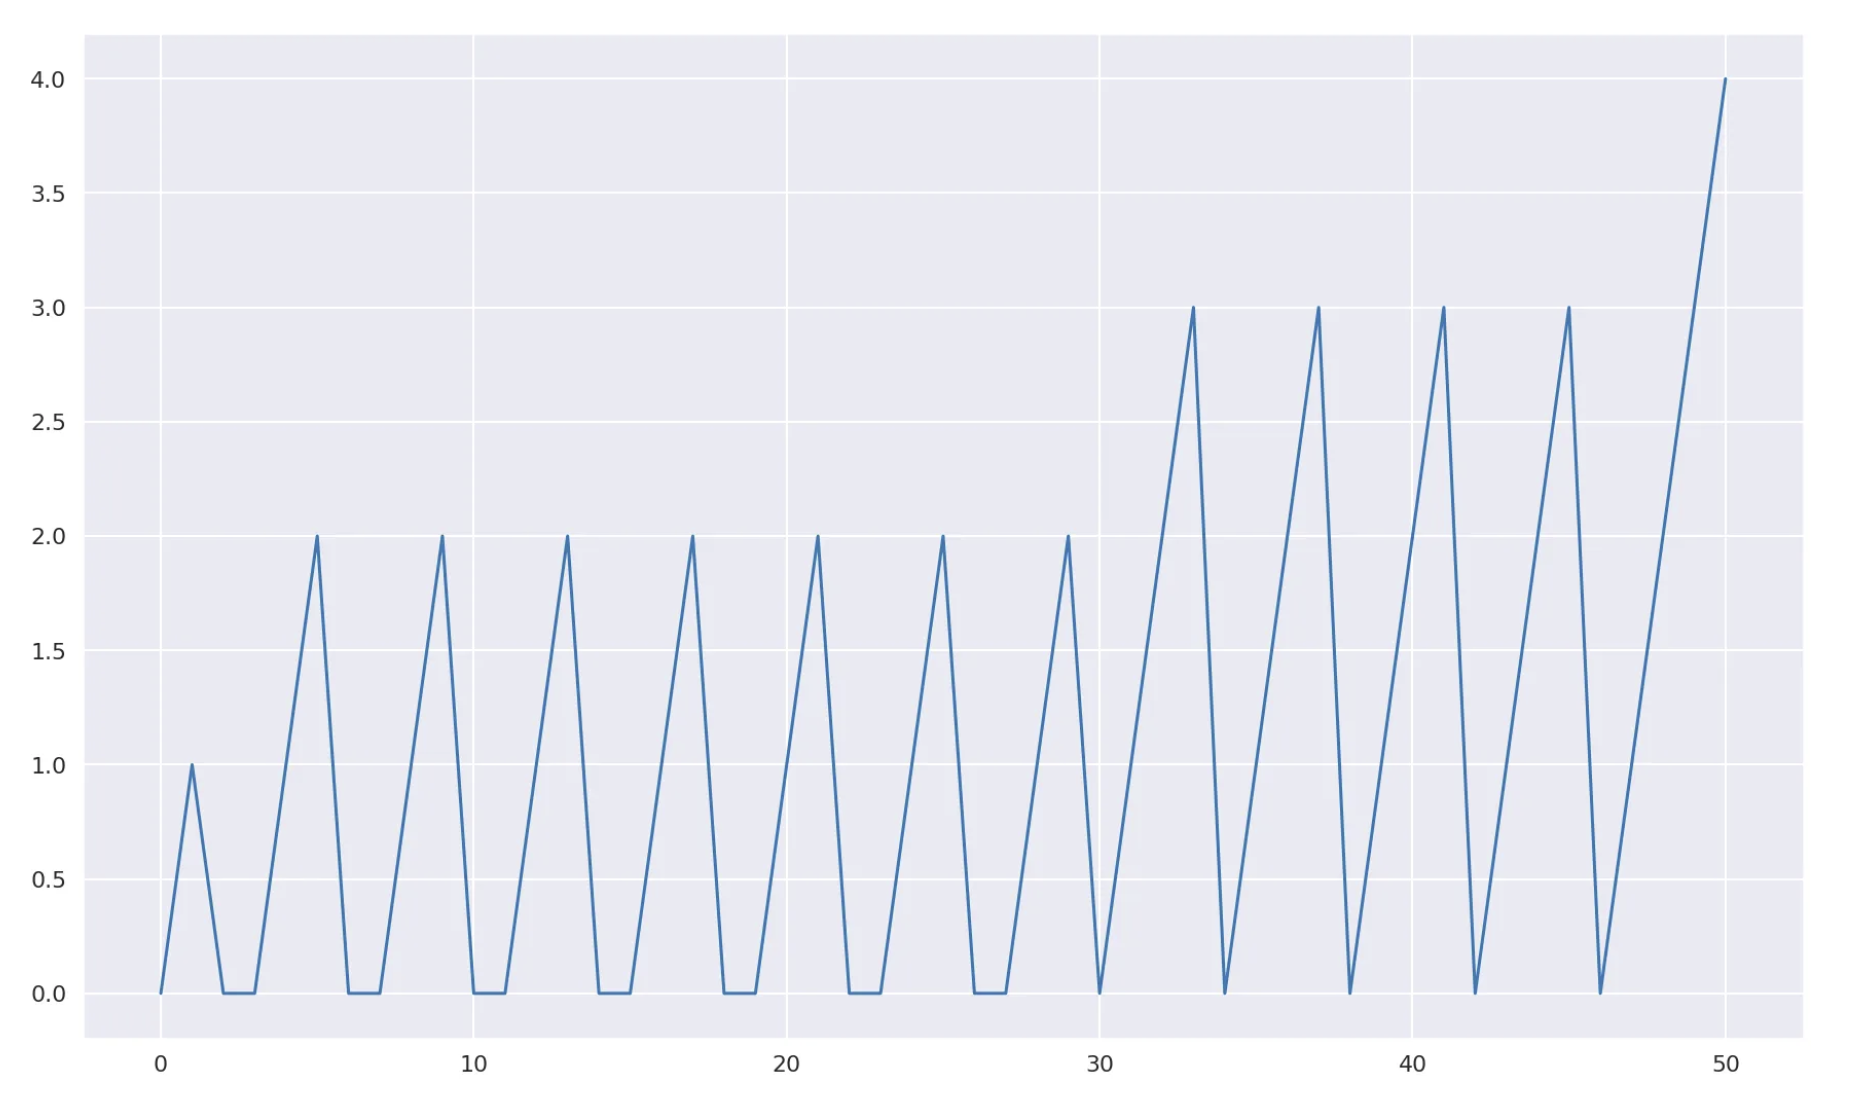

The correct_counter plot for our OR perceptron

This converges, since the data for the OR function is linearly separable. If we plot the number of correctly classified consecutive datapoints as we did in our first attempt, we get this plot. It’s clear that around iteration 50, it hits the value 4, meaning that it classified the entire dataset correctly.

### correct_counter measures the number of consecutive datapoints correctly classified by our Perceptron

The decision boundary plot looks like this:

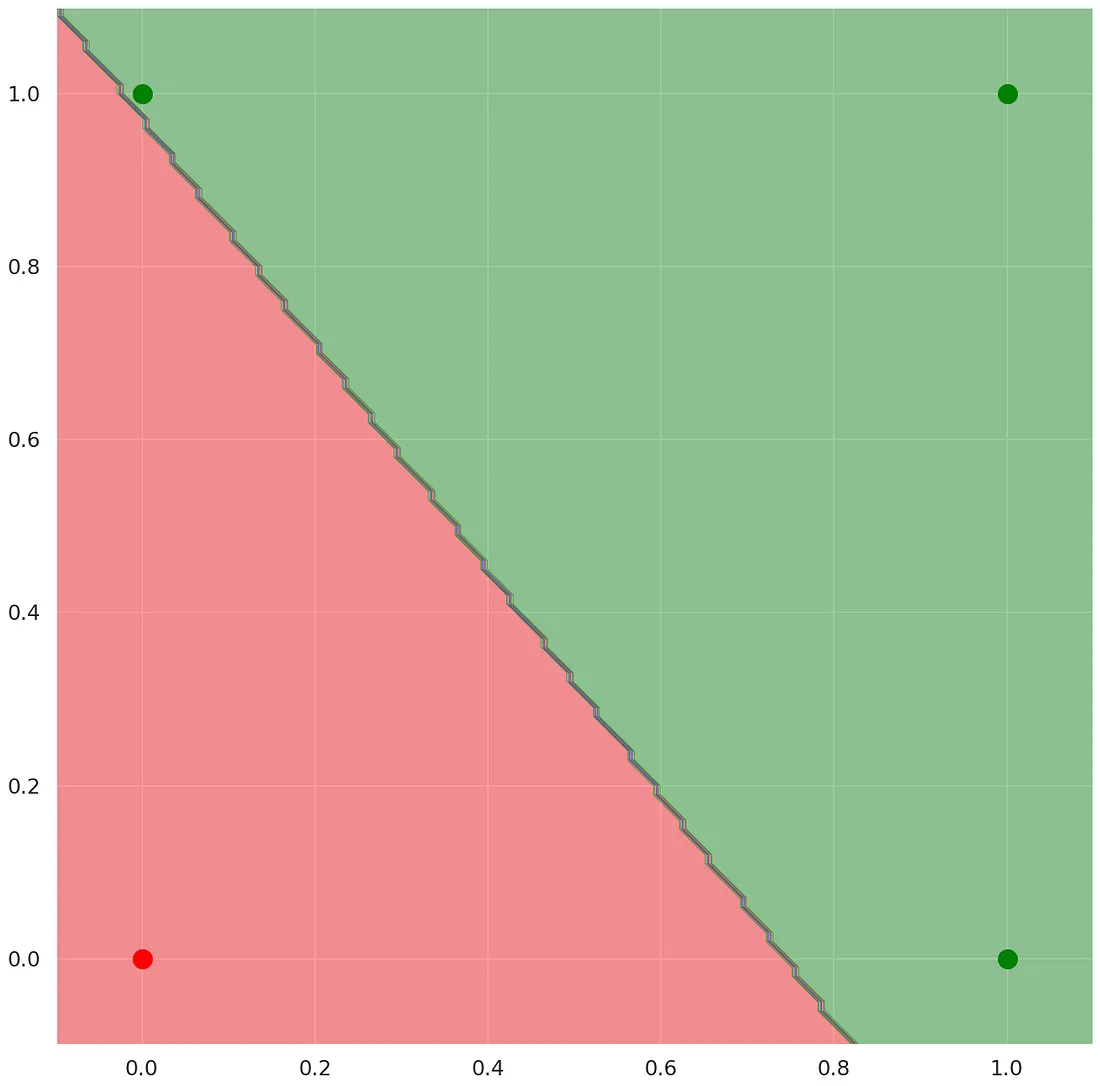

The Output plot of our OR perceptron 

### **Modelling the NAND part**
Let’s move on to the second part. We need to model a NAND gate. Just like the OR part, we’ll use the same code, but train the model on the NAND data. So our input data would be:

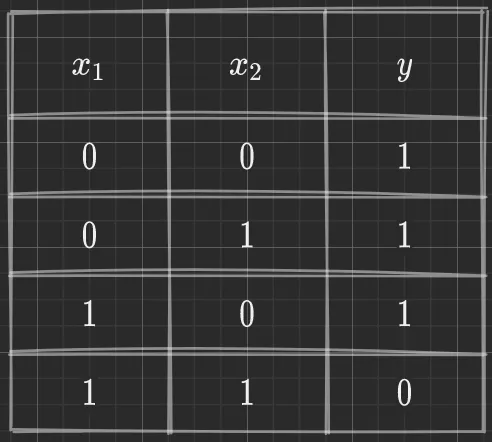

The NAND Truth table 

After training, the following plots show that our model converged on the NAND data and mimics the NAND gate perfectly.

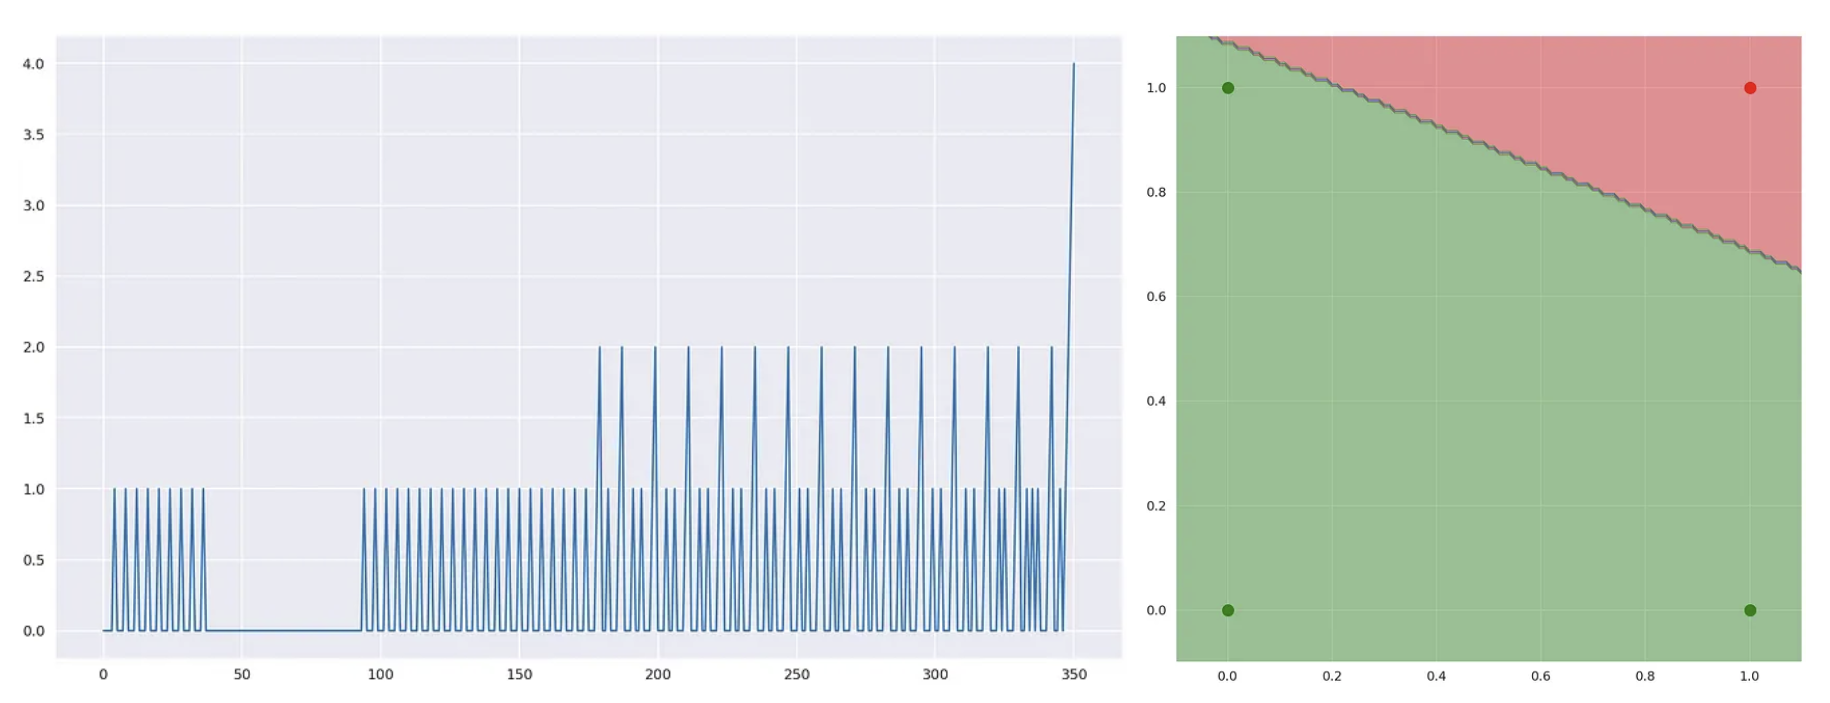

Decision boundary and correct_counter plots for the NAND perceptron

### _**Bringing everything together**_

Two things are clear from this:

*   we are performing a logical AND on the outputs of two logic gates (where the first one is an OR and the second one a NAND)
*   and that both functions are being passed the same input (x1 and x2).





Let’s model this into our network. First, let’s consider our two perceptrons as black boxes.

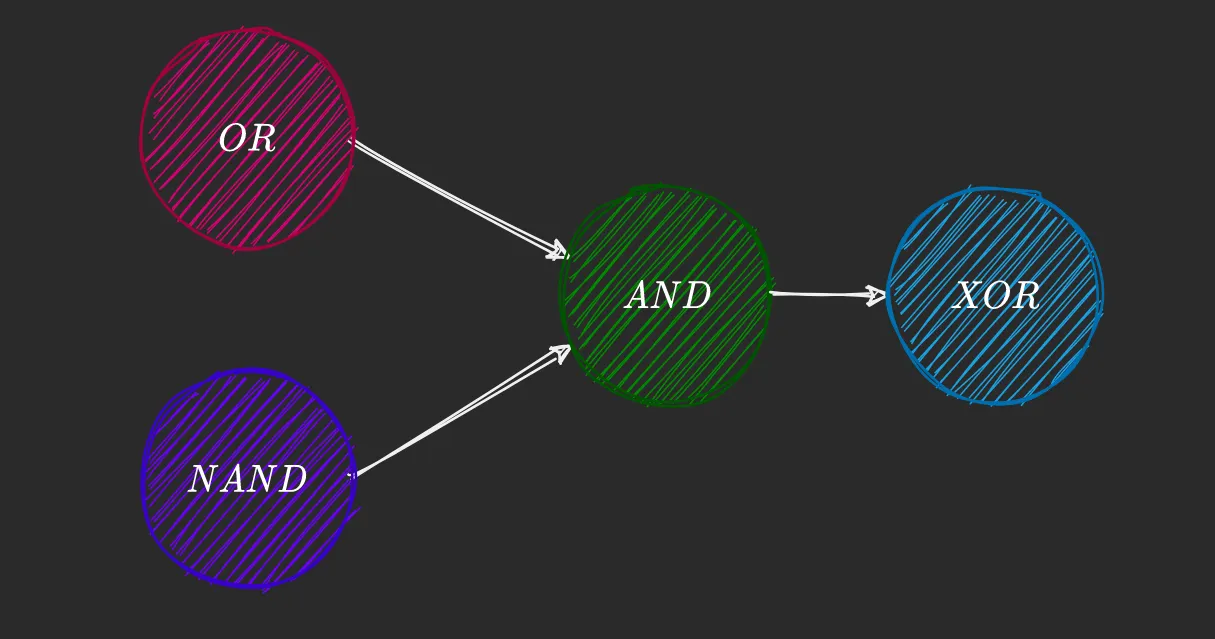

The plan for our model 

After adding our input nodes x_1 and x_2, we can finally implement this through a simple function.



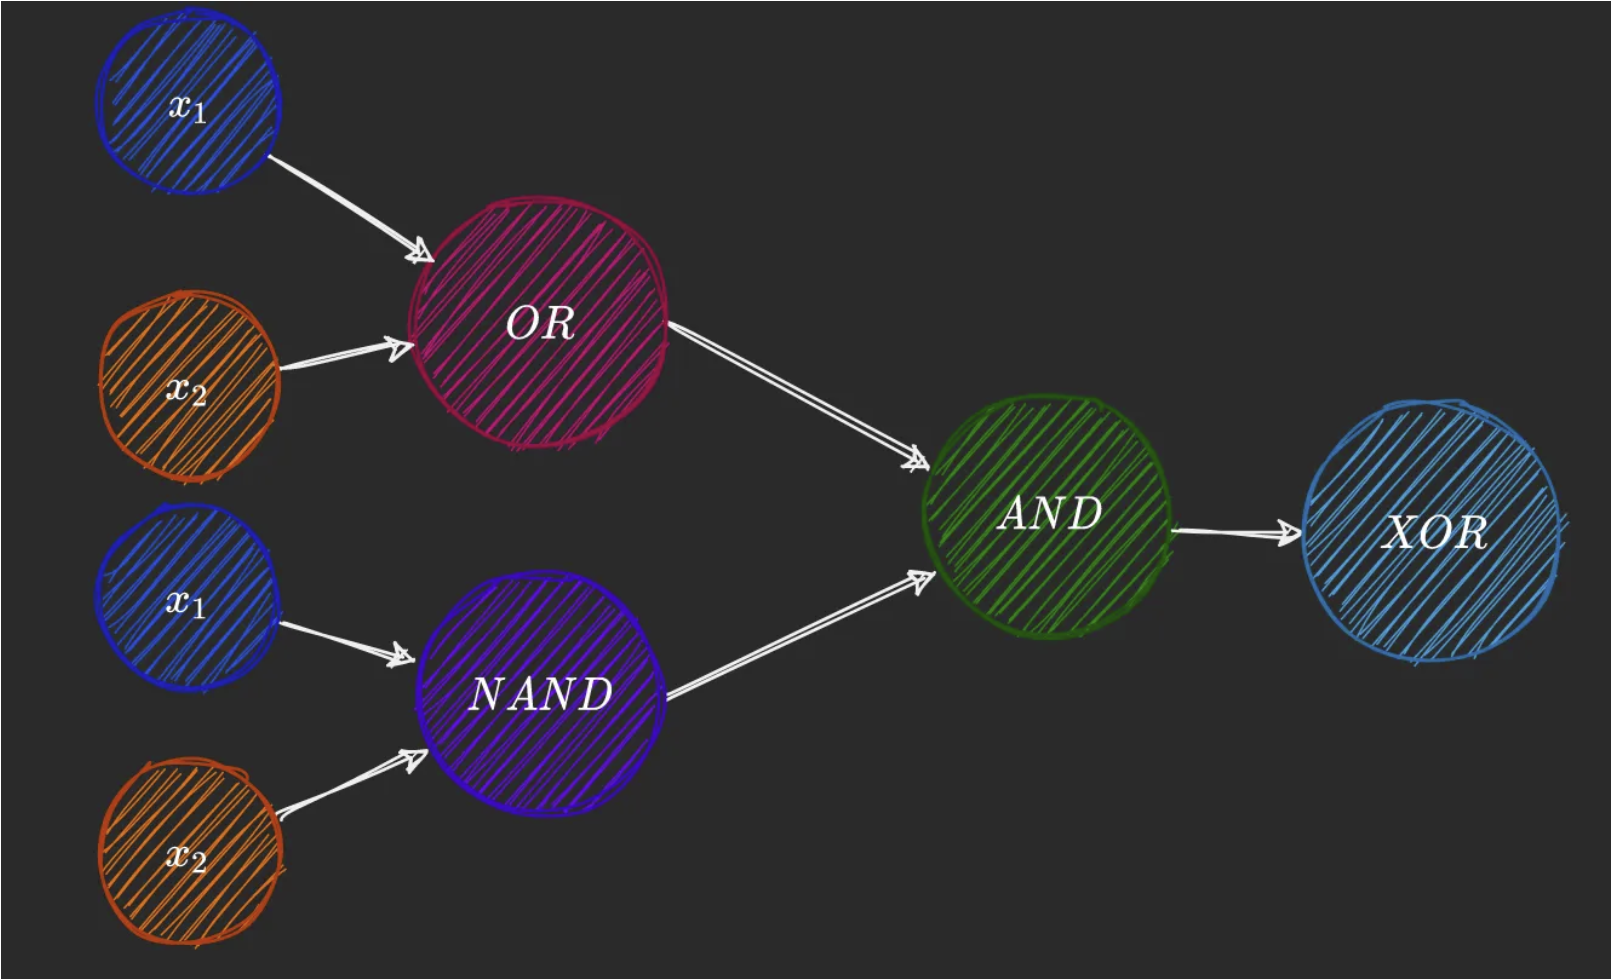

Finally, we need an AND gate, which we’ll train just we have been.

In [9]:
p_and = Perceptron(train_data, target_and)
p_and.train()

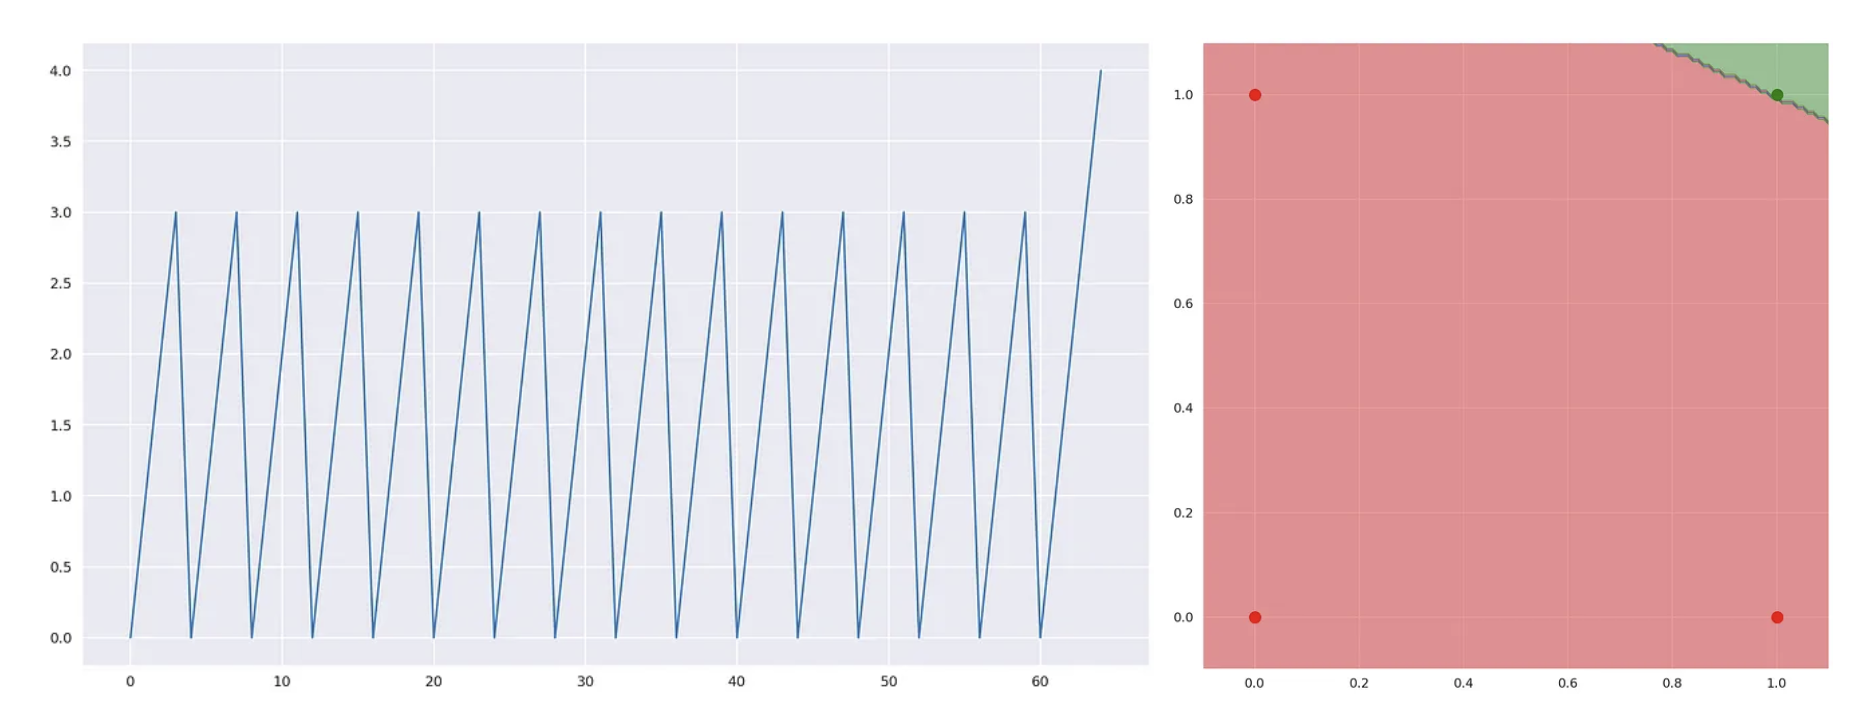

The correct_count and output plots of our AND perceptron.

What we now have is a model that mimics the XOR function.

If we were to implement our XOR model, it would look something like this:

In [10]:
def XOR(x1, x2):
    """
    Return the boolean XOR of x1 and x2
    """

    x = [x1, x2]
    p_or = Perceptron(train_data, target_or)
    p_nand = Perceptron(train_data, target_nand)
    p_and = Perceptron(train_data, target_and)

    p_or.train()
    p_nand.train()
    p_and.train()

    return p_and.classify([p_or.classify(x),
                          p_nand.classify(x)])

If we plot the decision boundaries from our model, — which is basically an AND of our OR and NAND models — we get something like this:

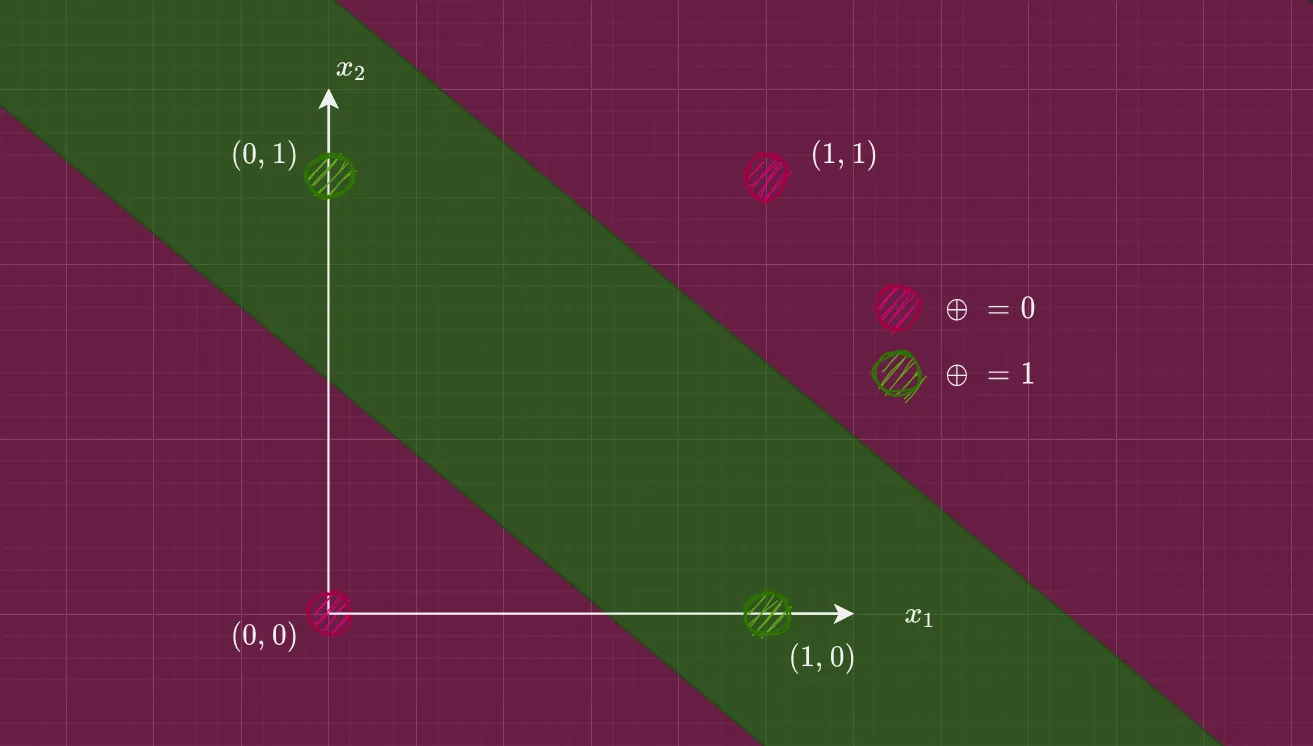

The Output plot of our 2nd Attempt, showing a correct classification on our XOR data

### Out of all the 2 input logic gates, the XOR and XNOR gates are the only ones that are not linearly-separable.

Though our model works, it doesn’t seem like a viable solution to most non-linear classification or regression tasks. It’s really specific to this case, and most problems can’t be split into just simple intermediate problems that can be individually solved and then combined. For something like this:



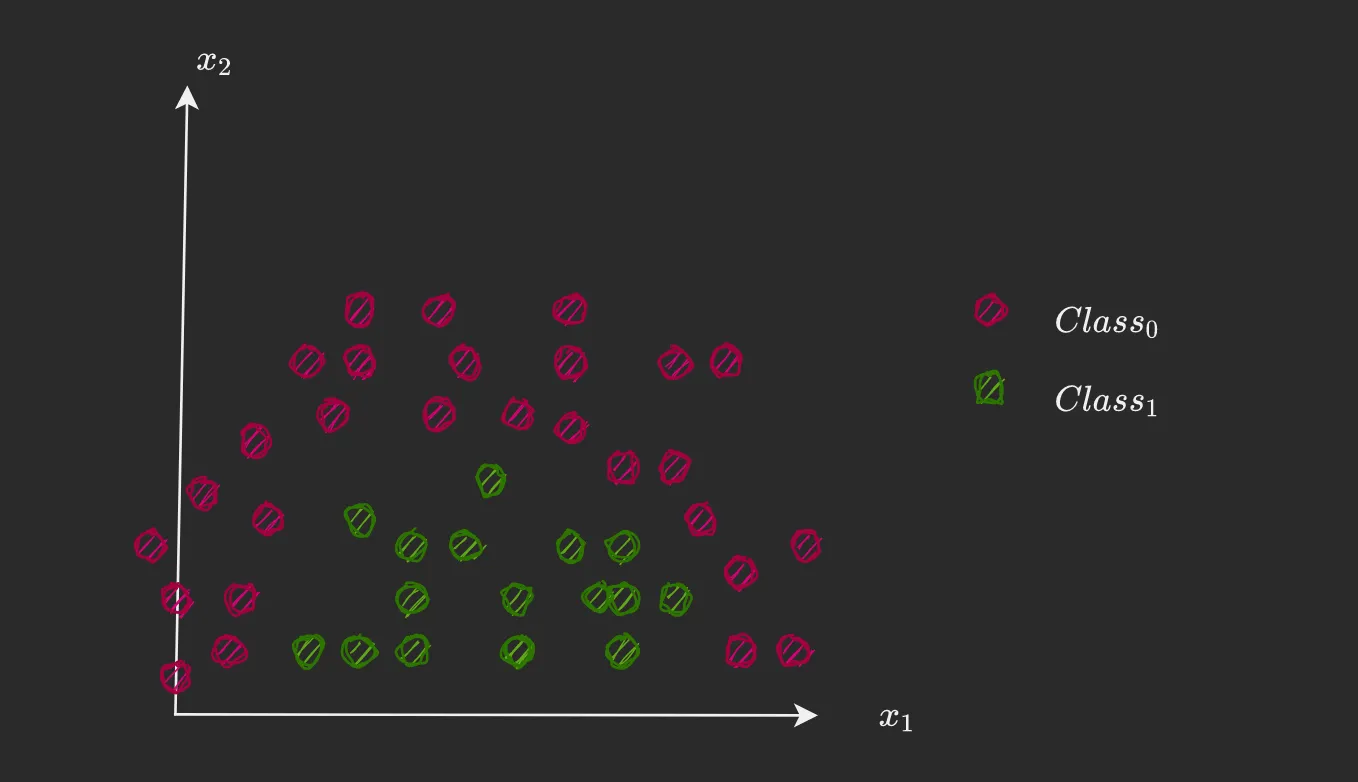

A binary classification problem in two dimensions

A potential decision boundary could be something like this:

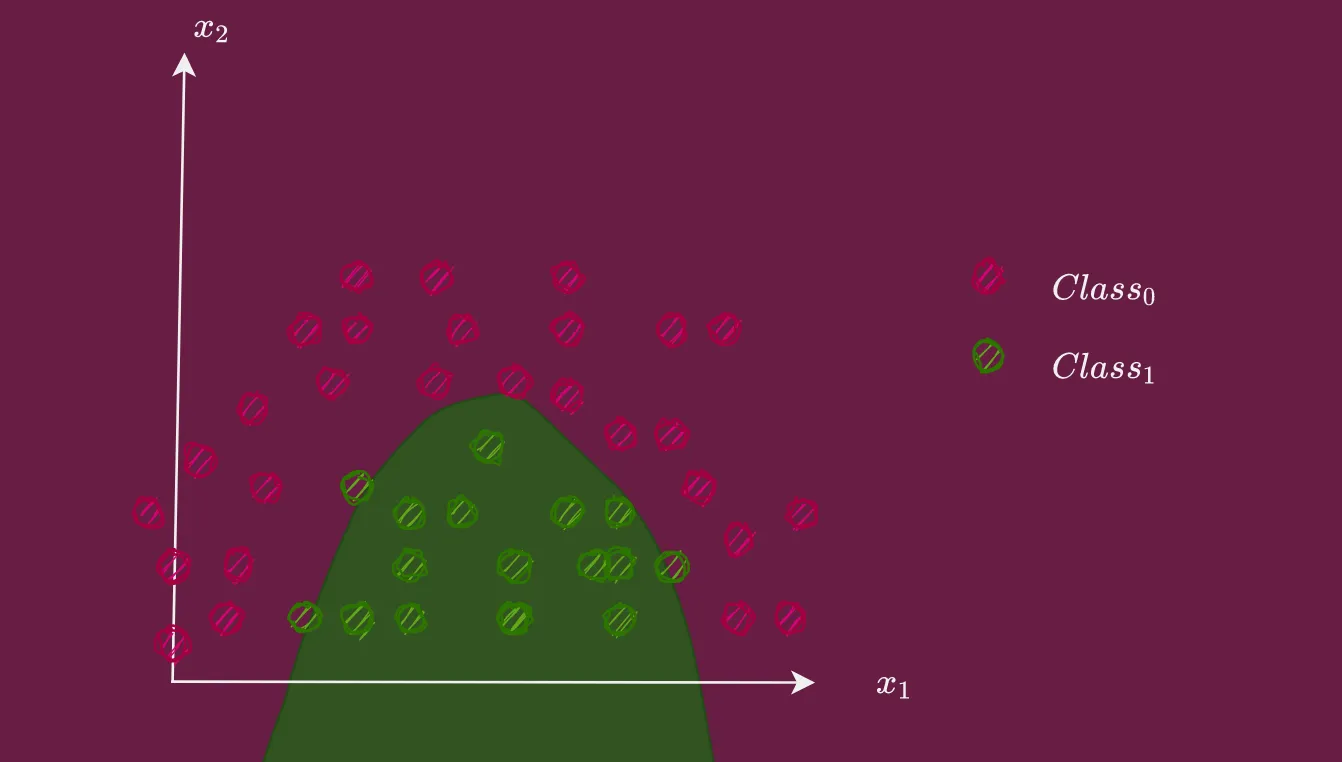

A potential decision boundary that fits our example

We need to look for a more general model, which would allow for non-linear decision boundaries, like a curve, as is the case above. Let’s see how an MLP solves this issue.

### **The Multi-layered Perceptron**
The overall components of an MLP like input and output nodes, activation function and weights and biases are the same as those we just discussed in a perceptron.

**The biggest difference? An MLP can have hidden layers.**

### Hidden layers
Hidden layers are those layers with nodes other than the input and output nodes.

**An MLP is generally restricted to having a single hidden layer.**

The hidden layer allows for non-linearity. A node in the hidden layer isn’t too different to an output node: nodes in the previous layers connect to it with their own weights and biases, and an output is computed, generally with an activation function.

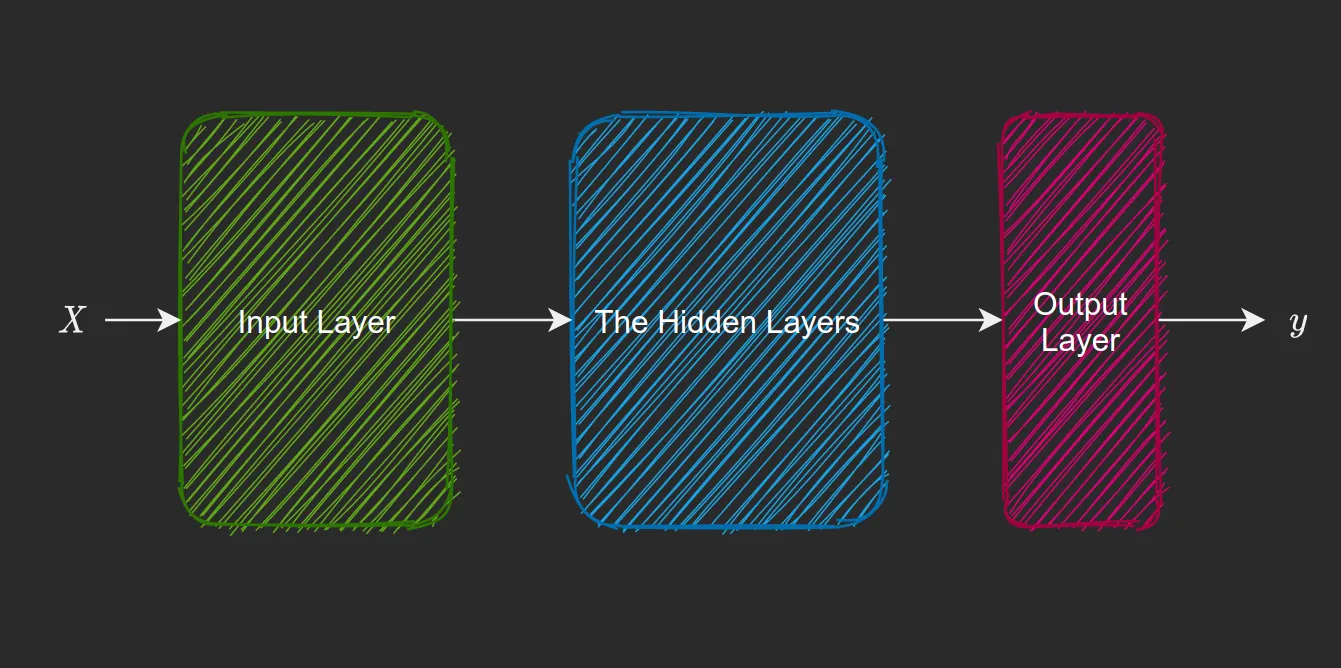

The general structure of a multi-layered perceptron

### **Activation Function**

Remember the linear activation function we used on the output node of our perceptron model? There are several more complex activation functions. You may have heard of the `sigmoid` and the `tanh` functions, which are some of the most popular non-linear activation functions.

Activation functions should be differentiable, so that a network’s parameters can be updated using backpropagation.

### Training algorithm
Though the output generation process is a direct extension of that of the perceptron, updating weights isn’t so straightforward. Here’s where backpropagation comes into the picture.

**Backpropagation** is a way to update the weights and biases of a model starting from the output layer all the way to the beginning. The main principle behind it is that each parameter changes in proportion to how much it affects the network’s output. A weight that has barely any effect on the output of the model will show a very small change, while one that has a large negative impact will change drastically to improve the model’s prediction power.

**Backpropagation is an algorithm for update the weights and biases of a model based on their gradients with respect to the error function, starting from the output layer all the way to the first layer.**

The method of updating weights directly follows from derivation and the chain rule.

# _**Attempt #3: the Multi-layered Perceptron**_
The architecture
There are no fixed rules on the number of hidden layers or the number of nodes in each layer of a network. The best performing models are obtained through trial and error.

**The architecture of a network refers to its general structure — the number of hidden layers, the number of nodes in each layer and how these nodes are inter-connected.**

Let’s go with a single hidden layer with two nodes in it. We’ll be using the sigmoid function in each of our hidden layer nodes and of course, our output node.

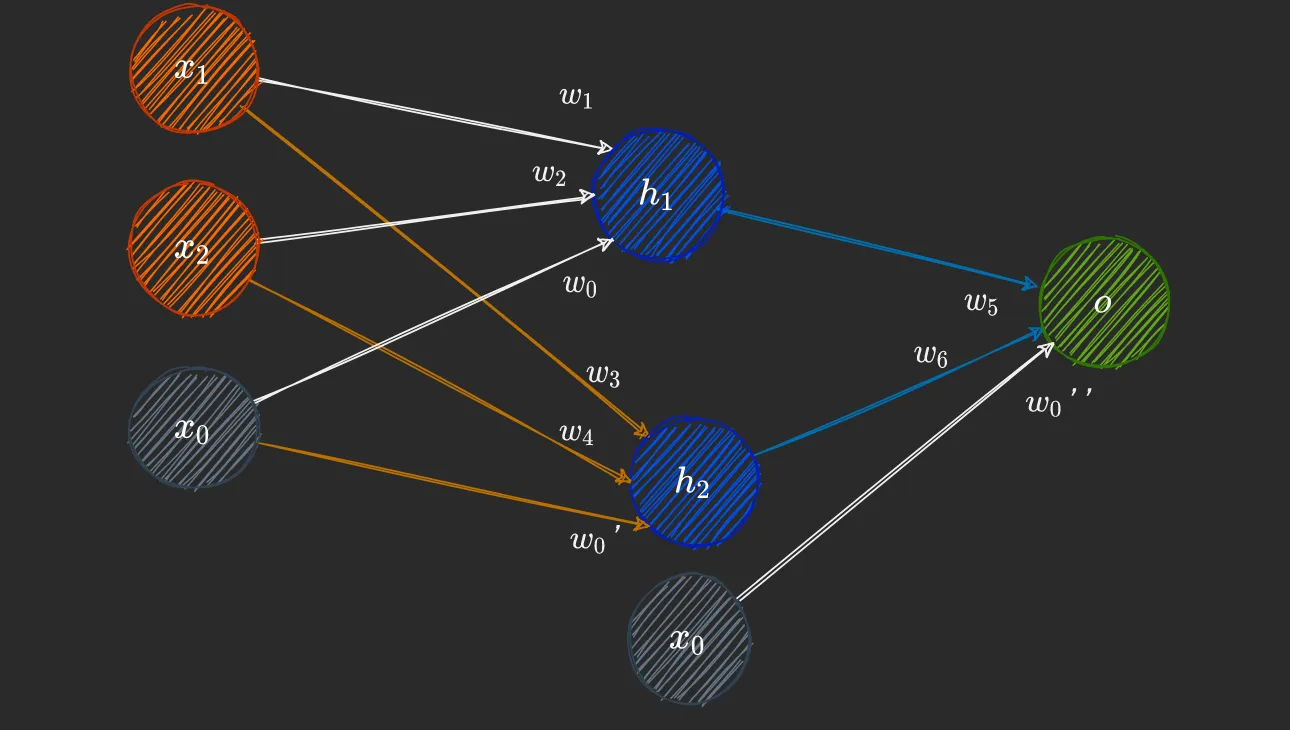

The final architecture of our MLP

### **Implementation**
The libraries used here like NumPy and pyplot are the same as those used in the Perceptron class.

## The training algorithm

The algorithm here is slightly different: we iterate through the training data a fixed number of times — `num_epochs` to be precise. In each iteration, we do a forward pass, followed by a backward pass where we update the weights and biases as necessary. This is called backpropagation.

In [11]:
def train(self):
    """
    Train an MLP. Runs through the data num_epochs number of times.
    A forward pass is done first, followed by a backward pass (backpropagation)
    where the networks parameter's are updated.
    """
    for _ in range(self.num_epochs):
        self.forward(self.train_data)
        self.update_weights()

### **The sigmoid activation function**

Here, we define a sigmoid function. As discussed, it’s applied to the output of each hidden layer node and the output node. Its differentiable, so it allows us to comfortably perform backpropagation to improve our model.

Its derivate its also implemented through the `_delsigmoid` function.

### **The forward and backward pass**

In the forward pass, we apply the `wX + b` relation multiple times, and applying a sigmoid function after each call.

In the backward pass, implemented as the `update_weights` function, we calculate the gradients of each of our 6 weights and 3 biases with respect to the error function and update them by the factor `learning rate * gradient`.

Finally, the classify function works as expected: Since a sigmoid function outputs values between 0 and 1, we simply interpret them as probabilities of belonging to a particular class. Hence, outputs greater than or equal to 0.5 are classified as belonging to `Class 1` while those outputs that are less than 0.5 are said to belong to `Class 0`.

### **The MLP class**

Let’s bring everything together by creating an MLP class. All the functions we just discussed are placed in it. The `plot` function is exactly the same as the one in the `Perceptron` class.

**Question: In the cell below, you will be ask to finish a line of code to implement the MLP class. Please fill in your code at necessary places.**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class MLP:
    """
    Create a multi-layer perceptron.
    train_data: A 4x2 matrix with the input data.
    target: A 4x1 matrix with expected outputs
    lr: the learning rate. Defaults to 0.1
    num_epochs: the number of times the training data goes through the model
        while training
    num_input: the number of nodes in the input layer of the MLP.
        Should be equal to the second dimension of train_data.

    num_hidden: the number of nodes in the hidden layer of the MLP.
    num_output: the number of nodes in the output layer of the MLP.
        Should be equal to the second dimension of target.
    """
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        # initialize both sets of weights and biases randomly
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))

        self.losses = []

    def update_weights(self):

        # Calculate the squared error
        loss = 0.5 *(self.target - self.output_final) ** 2
        print(loss)
        self.losses.append(np.sum(loss))
        
        ###################################################################################################
        ## Starting from here, you will be asked to finish several lines of codes to implement Backprop.
        ## Notice that all layers and weight matrices are transposed compared with the notation in class.
        ## You will have to modify the your maths accordingly.
        ###################################################################################################
        
        # the gradient for the output layer A2, also known as error
        error_term = (self.target - self.output_final) * self._delsigmoid(self.output_final)  # this is also dA2
        
        # the gradient for the output layer Z2
        dZ2 = error_term                                    # calculate the dC/dZ2 in this line
        
        # the gradient for the output layer weights
        dW2 = np.dot(self.hidden_out.T, dZ2)               # calculate the dC/dW2 in this line
        
        # the gradient for the output layer biases
        dB2 = np.sum(dZ2, axis=0, keepdims=True)           # calculate the dC/dB2 in this line
        
        # the gradient for the hidden layer A1 and Z1
        dA1 = np.dot(dZ2, self.weights_12.T)               # calculate the dC/dA1 in this line
        dZ1 = dA1 * self._delsigmoid(self.hidden_out)      # calculate the dC/dZ1 in this line

        # the gradient for the hidden layer weights
        dW1 = np.dot(self.train_data.T, dZ1)               # calculate the dC/dW1 in this line
        
        # the gradient for the hidden layer biases
        dB1 = np.sum(dZ1, axis=0, keepdims=True)           # calculate the dC/dB1 in this line
        
        print("grad01: ", dW1)
        print(dW1.shape)



        print("grad12: ", dW2)
        print(dW2.shape)        
        # updating the weights by the learning rate times their gradient
        self.weights_01 += self.lr * dW1
        self.weights_12 += self.lr * dW2

        # update the biases the same way
        self.b01 += self.lr * dB1
        self.b12 += self.lr * dB2

    def _sigmoid(self, x):
        """
        The sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))                           # write down the expression for the sigmoid activation function.

    def _delsigmoid(self, y):
        """
        The first derivative of the sigmoid function wrt x, notice that y = sigmoid(x)
        And you only need to use value of y to calculate the derivative. 
        """
        return y * (1 - y)                          # write down the term that returns the derivative of y = sigmoid(x) wrt x. Again it is an expression of y ONLY.
    
    def forward(self, batch):
        """
        A single forward pass through the network.
        Implementation of wX + b
        """

        self.hidden_ = np.dot(batch, self.weights_01) + self.b01                               # write down the expression for the hidden layer, before activation
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12                               # write down the expression for the output layer, before activation
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):
        """
        Train an MLP. Runs through the data num_epochs number of times.
        A forward pass is done first, followed by a backward pass (backpropagation)
        where the networks parameter's are updated.
        """
        losses = []
        for _ in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()
            losses.append(self.losses[-1])

        # Plotting the loss curve
        plt.plot(losses)
        plt.title("Loss Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

### **Results**
Let’s train our MLP with a learning rate of `0.2` over `5000` epochs.

[[0.30667809]
 [0.01926063]
 [0.01983511]
 [0.33305619]]
grad01:  [[-0.00154954 -0.00865173]
 [-0.00167245 -0.00895307]]
(2, 2)
grad12:  [[-0.15122393]
 [-0.13321975]]
(2, 1)
[[0.2963675 ]
 [0.02201285]
 [0.02261608]
 [0.32206743]]
grad01:  [[-0.0013011  -0.00833529]
 [-0.00141661 -0.00864879]]
(2, 2)
grad12:  [[-0.15152497]
 [-0.1333161 ]]
(2, 1)
[[0.28580761]
 [0.02510066]
 [0.02572862]
 [0.31067225]]
grad01:  [[-0.00104697 -0.00794096]
 [-0.00115193 -0.00826521]]
(2, 2)
grad12:  [[-0.15078058]
 [-0.13249628]]
(2, 1)
[[0.27510011]
 [0.02852802]
 [0.02917533]
 [0.29898126]]
grad01:  [[-0.00079587 -0.00747303]
 [-0.00088686 -0.00780635]]
(2, 2)
grad12:  [[-0.14891093]
 [-0.13069511]]
(2, 1)
[[0.26435985]
 [0.0322861 ]
 [0.03294615]
 [0.28712568]]
grad01:  [[-0.00055729 -0.00693998]
 [-0.00063079 -0.00728049]]
(2, 2)
grad12:  [[-0.1458821 ]
 [-0.12788781]]
(2, 1)
[[0.25370915]
 [0.03635157]
 [0.03701673]
 [0.27525102]]
grad01:  [[-0.0003407  -0.00635418]
 [-0.00039324 -0.00669989]]
(2, 

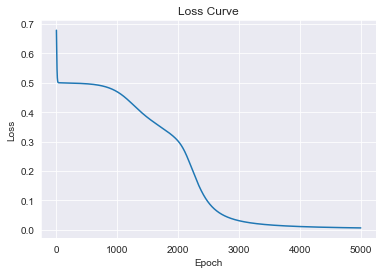

In [28]:
mlp = MLP(train_data, target_xor, 0.2, 5000)
mlp.train()

If we plot the values of our loss function, we get the following plot after about 5000 iterations, showing that our model has indeed converged. It should look like the curve below.

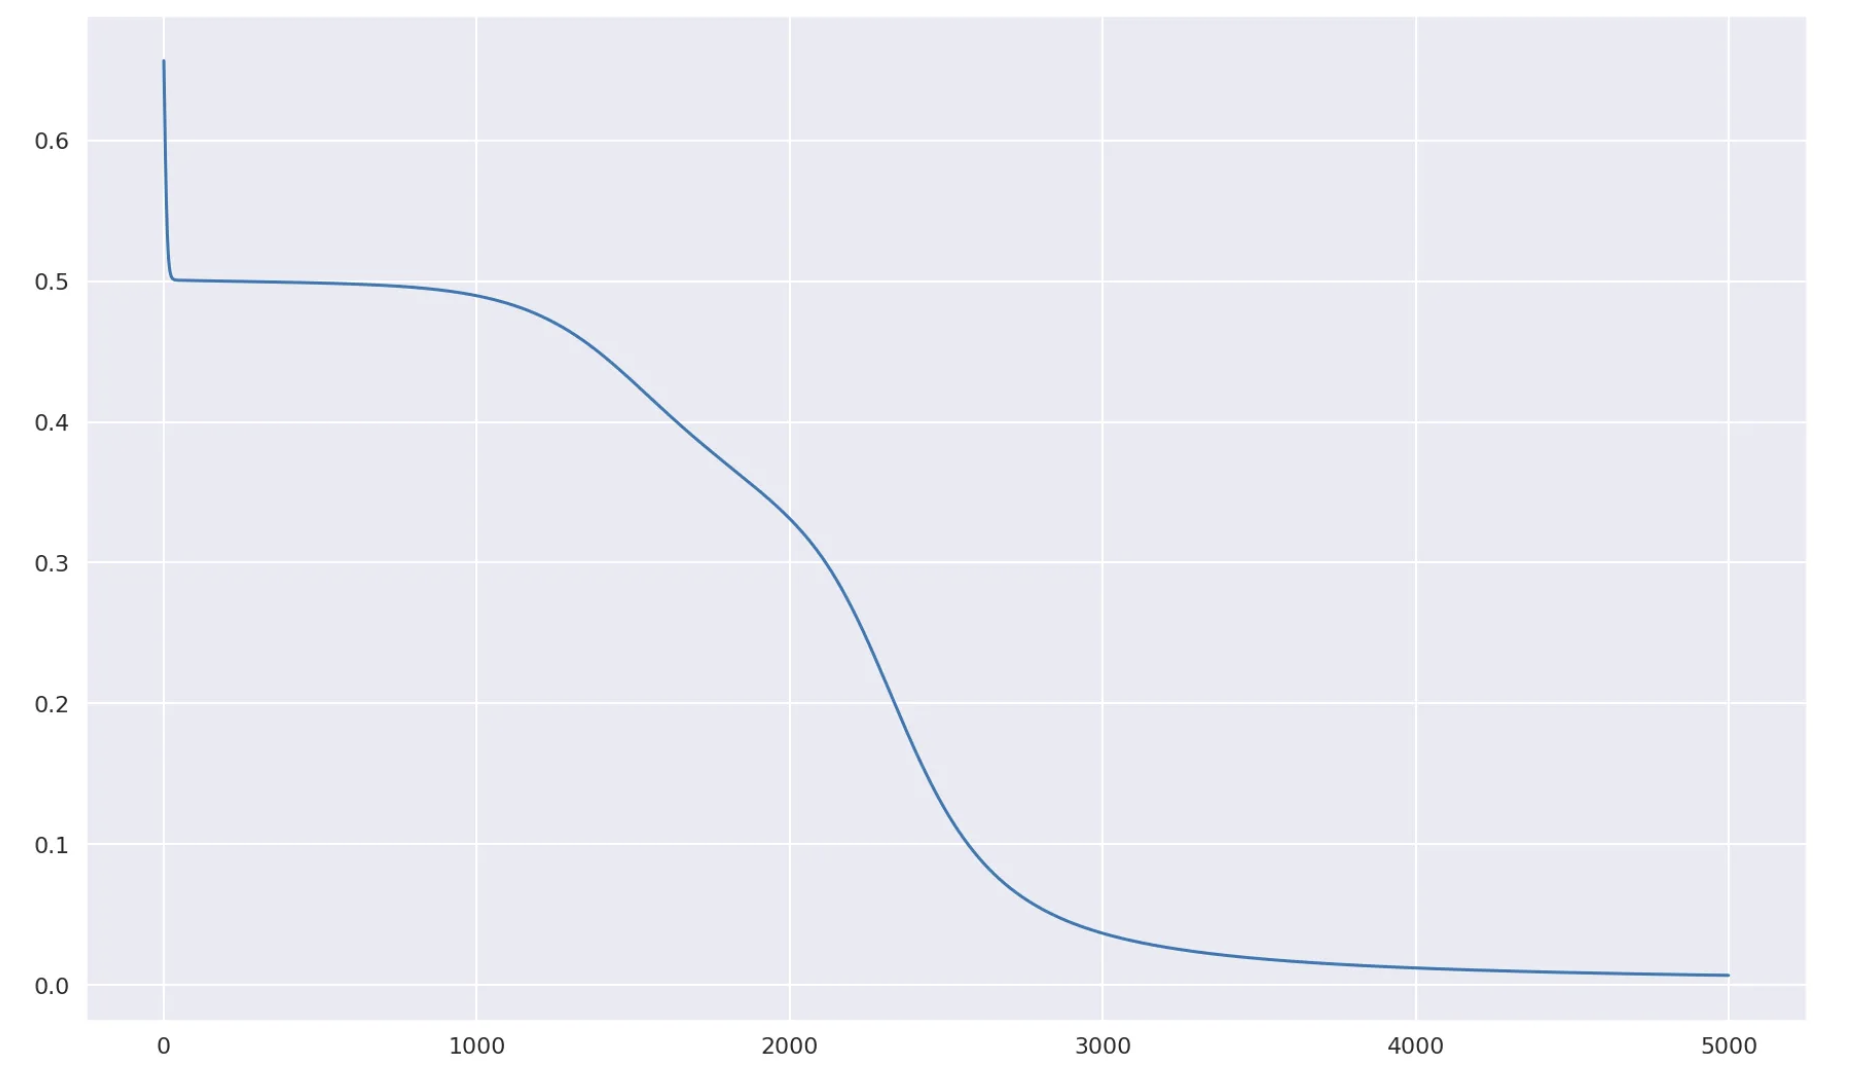

**Question: In the cell below, write the code to implement the Loss Plot over 5000 epochs of our MLP**

In [29]:
# implement loss plot here
print(mlp.losses[:10])

[0.6788300115691794, 0.6630638663829267, 0.6473091407902898, 0.6317847216191554, 0.6167177753656956, 0.6023284714574286, 0.5888138876558991, 0.5763336349571391, 0.5649995902473524, 0.5548712945133468]


**Question: A clear non-linear decision boundary is created here with our generalized neural network, or MLP. In the cell below, use the plot function from the MLP class to visualize the decision boundary**

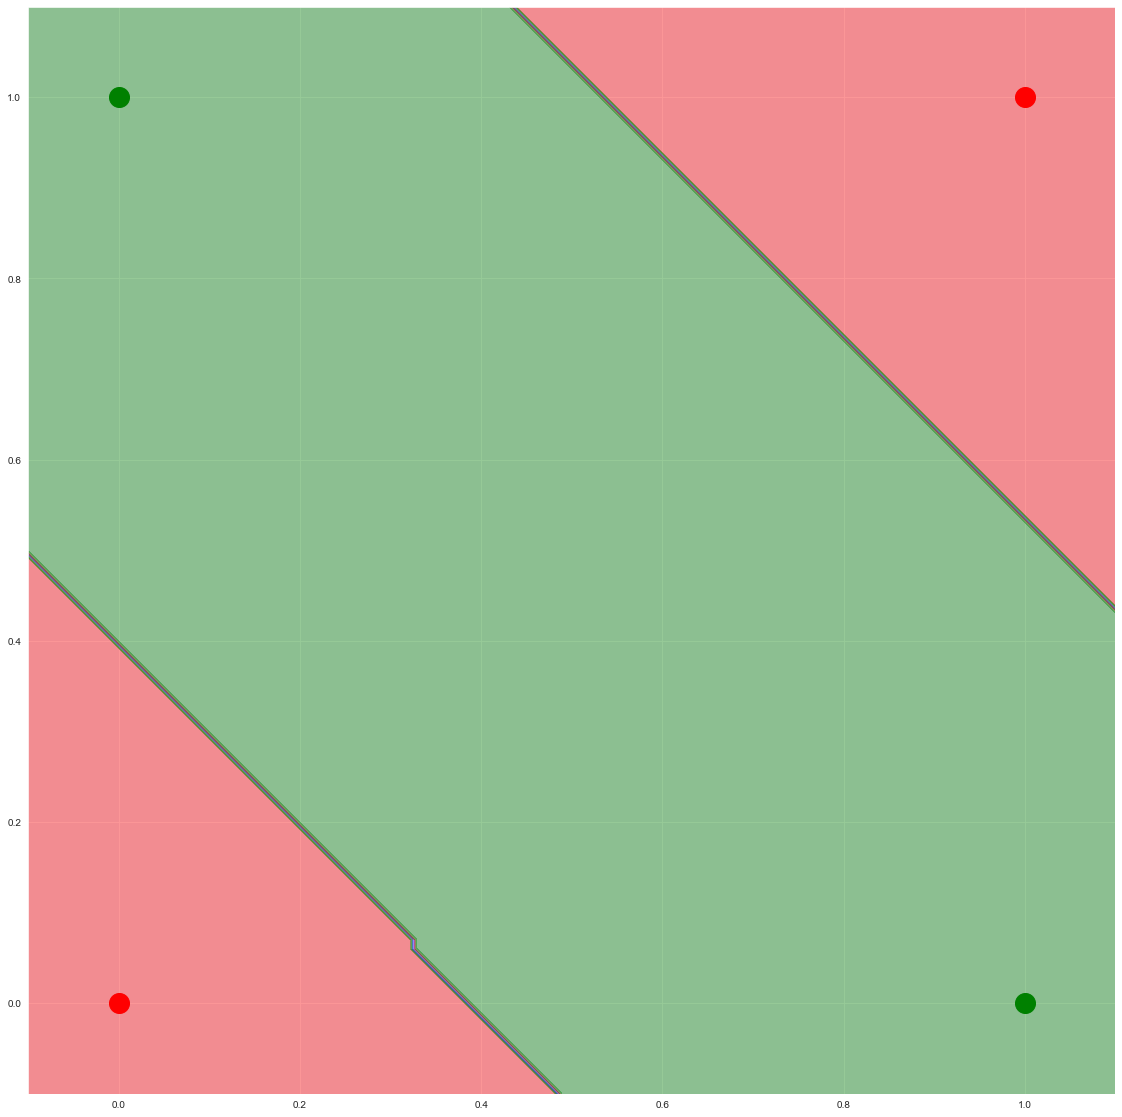

In [30]:
# call the plot method from the MLP class here. 
mlp.plot()

# Show the plot
plt.show()

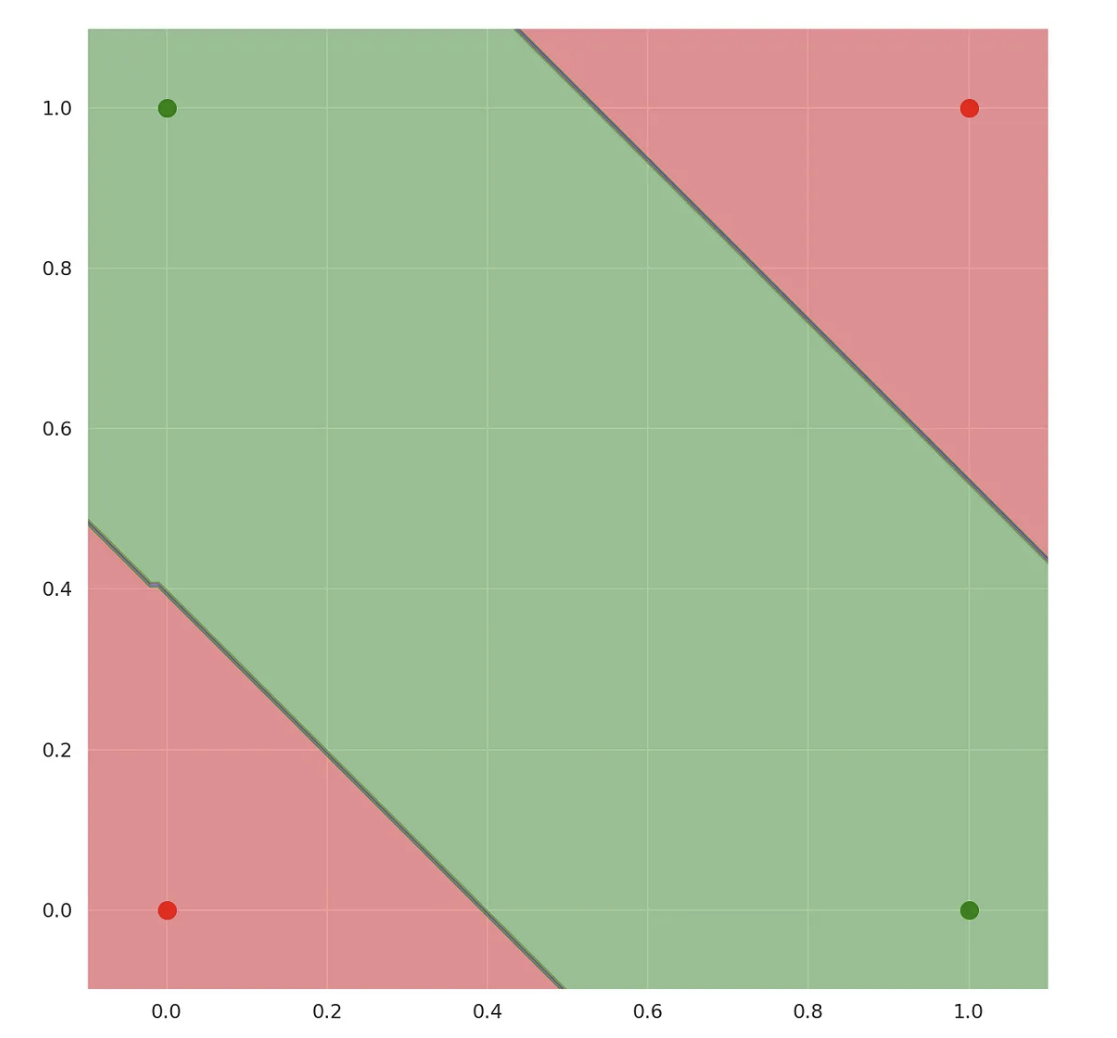

The Decision Boundary plot, showing the decision boundary and the classes

### **Note #1: Adding more layers or nodes**
Adding more layers or nodes gives increasingly complex decision boundaries. But this could also lead to something called overfitting — where a model achieves very high accuracies on the training data, but fails to generalize.

A good resource is the Tensorflow Neural Net playground, where you can try out different network architectures and view the results.

### **Note #2: Choosing a loss function**
The loss function we used in our MLP model is the Mean Squared loss function. Though this is a very popular loss function, it makes some assumptions on the data (like it being gaussian) and isn’t always convex when it comes to a classification problem. It was used here to make it easier to understand how a perceptron works, but for classification tasks, there are better alternatives, like binary cross-entropy loss.